Black Dots count is: 3


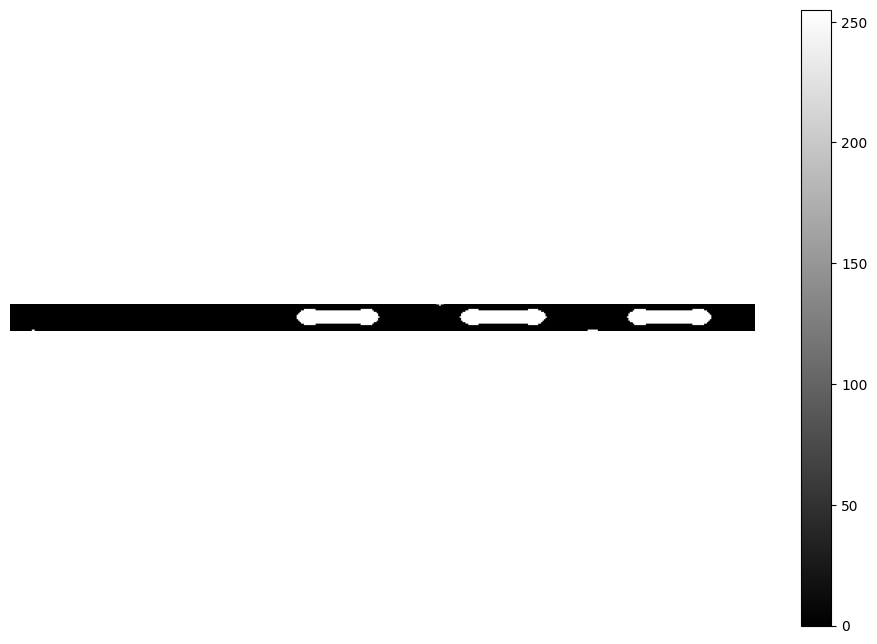

424
309
197
315
38.4765625
1


In [44]:
import cv2
import numpy as np

# Load image
image = cv2.imread('data/wildtype_Mtb/2024-08i WT Mtb 2nd exp_D2_20.tif')

# Get image dimensions
height, width = image.shape[:2]

# Calculate the cutoff points (bottom-right 10%)
cutoff_h1 = int(height * 0.975)
cutoff_h2 = int(height * 0.98)
cutoff_w1 = int(width * 0.9)

# Crop the image correctly (bottom-right 10%)
image = image[cutoff_h1:cutoff_h2, cutoff_w1:]

blur = cv2.medianBlur(image, 9)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 2)

thresh= cv2.medianBlur(thresh, 15)

thresh = cv2.threshold(thresh, 45, 255, cv2.THRESH_BINARY_INV)[1]

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 200
black_dots = []


for c in cnts:
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)
    if perimeter == 0:
        continue  # Avoid division by zero
    if area > min_area:
      black_dots.append(c)

cv2.drawContours(image, black_dots, -1, (36, 255, 12), 2)  # Draw contours in green
cv2.imwrite('result_adapt_thresh.jpg', image)

print("Black Dots count is:", len(black_dots))
picture = np.array(thresh)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.imshow(picture, cmap='gray')
plt.axis('off'); plt.axis('image'); plt.colorbar()
plt.show()

# Find the leftmost X-coordinate
leftmost_x = float('inf')  # Initialize to a large number

for c in black_dots:
    x, y, w, h = cv2.boundingRect(c)  # Get bounding box of each contour
    if x < leftmost_x :
        leftmost_x = x
        print(leftmost_x)

# Get the width of the cropped image
cropped_width = image.shape[1]

# Calculate width between leftmost X and the right edge
width_to_right = cropped_width - leftmost_x

print(width_to_right)

cropped_width = image.shape[1]  # Get the width of the cropped image

leftmost_x_percentage = (leftmost_x / cropped_width) * 100

print(leftmost_x_percentage)

dot_size = int(width_to_right*0.3*(1/(100-leftmost_x_percentage)))
print(dot_size)